In [447]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lasio
import missingno as msno

from tslearn.metrics import dtw,dtw_path,dtw_path_from_metric
from scipy.signal import medfilt

In [448]:
las1 = lasio.read(r'C:\Users\mno\Desktop\mno\Nilo\tcc\LAS\1_ALV_5_BA_1.las')
las2 = lasio.read(r'C:\Users\mno\Desktop\mno\Nilo\tcc\LAS\1_ALV_6D_BA.las')
las3 = lasio.read(r'C:\Users\mno\Desktop\mno\Nilo\tcc\LAS\3_MGP_19_BA.las')
las4 = lasio.read(r'C:\Users\mno\Desktop\mno\Nilo\tcc\LAS\3_MGP_35D_BA.las')
df = las1.df()
df2 = las2.df()
df3 = las3.df()
df4 = las4.df()

In [449]:
df['PERFIL'] = '1_ALV_5_BA'
df2['PERFIL'] = '1_ALV_6D_BA'
df3['PERFIL'] = '3_MGP_19_BA'
df4['PERFIL'] = '3_MGP_35D_BA'

In [450]:
wells = ['1_ALV_5_BA', '1_ALV_6D_BA','3_MGP_19_BA','3_MGP_35D_BA']

In [451]:
df = df.reset_index()
df2 = df2.reset_index()
df3 = df3.reset_index()
df4 = df4.reset_index()

In [452]:
data = df3[df3.PERFIL.isin(wells)]
data2 = df4[df4.PERFIL.isin(wells)]

In [453]:
data = data[data.GR>0]
data2 = data2[data2.GR>0]

In [482]:
t1 = data[data.PERFIL=='3_MGP_19_BA'][['DEPTH','GR']]
t2 = data2[data2.PERFIL=='3_MGP_35D_BA'][['DEPTH','GR']]

In [483]:
n_med=151
t1['GR'] = medfilt(t1['GR'],kernel_size=n_med)
t2['GR'] = medfilt(t2['GR'],kernel_size=n_med)

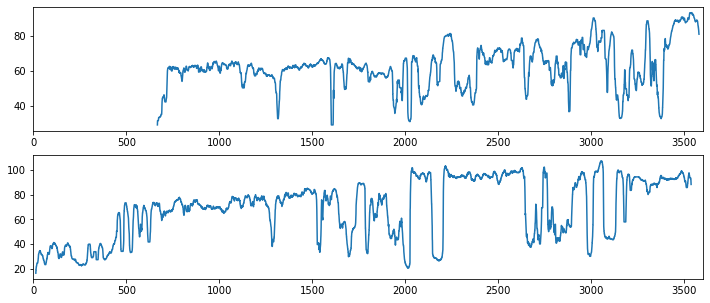

In [456]:
fig,axes = plt.subplots(nrows=2,figsize=(12,5))
axes[0].plot(t1['DEPTH'],t1['GR'])
axes[1].plot(t2['DEPTH'],t2['GR'])

for ax in axes:
    ax.set_xlim(0,3600)

In [484]:
t1 = t1[t1.DEPTH<=3600]

In [485]:
t1.head()

,DEPTH,GR
0,667.0548,29.1818
1,667.2072,29.4705
2,667.3596,31.4765
3,667.5120,31.5237
4,667.6644,31.5237


In [486]:
dz = 667.2072-667.0548
depth = np.arange(0,667.0548+dz,dz)

In [487]:
t1 = t1[t1.DEPTH<=3600]
t2 = t2[t2.DEPTH<=3600]

In [488]:
t1_cor = pd.DataFrame({'DEPTH':depth})
t1_cor

,DEPTH
0,0.0000
1,0.1524
2,0.3048
3,0.4572
4,0.6096
...,...
4374,666.5976
4375,666.7500
4376,666.9024
4377,667.0548


In [489]:
t1_cor = pd.concat([t1_cor,t1])

In [490]:
t1_cor[t1_cor.GR.isna()]

,DEPTH,GR
0,0.0000,NaN
1,0.1524,NaN
2,0.3048,NaN
3,0.4572,NaN
4,0.6096,NaN
...,...,...
4374,666.5976,NaN
4375,666.7500,NaN
4376,666.9024,NaN
4377,667.0548,NaN


In [491]:
t1_cor=t1_cor.fillna(value=0.0)

In [492]:
t1_cor = t1_cor[t1_cor.DEPTH>14]

In [493]:
t1_cor.head()

,DEPTH,GR
92,14.0208,0.0
93,14.1732,0.0
94,14.3256,0.0
95,14.4780,0.0
96,14.6304,0.0


In [557]:
400/(t1_cor.DEPTH.values[1]-t1_cor.DEPTH.values[0])

2624.6719160114762

In [562]:
path,cost = dtw_path(t1_cor.GR.values/t1_cor.GR.std(),t2.GR.values/t2.GR.std(),global_constraint="sakoe_chiba", sakoe_chiba_radius=2650)

In [578]:
cost_list = [dtw(t1_cor.GR.values/t1_cor.GR.std(),t2.GR.values/t2.GR.std(),global_constraint="sakoe_chiba", sakoe_chiba_radius=i) for i in range(1000,10000+250,250)]

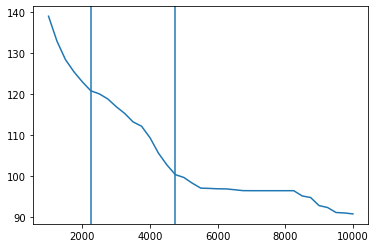

In [584]:
plt.plot(np.arange(1000,10000+250,250),cost_list)
plt.axvline(x=2250)
plt.axvline(x=4750)

In [585]:
path,cost = dtw_path(t1_cor.GR.values/t1_cor.GR.std(),t2.GR.values/t2.GR.std(),global_constraint="sakoe_chiba", sakoe_chiba_radius=2250)

In [586]:
t1_cor.reset_index(drop=True,inplace=True)
t2.reset_index(drop=True,inplace=True)

In [599]:
shift =0

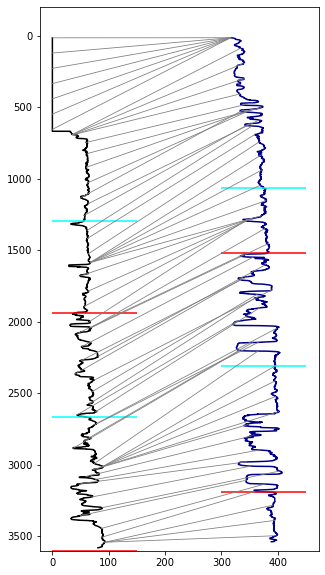

In [600]:
fig,axes = plt.subplots(nrows=1,figsize=(5,10))
axes.plot(t1_cor['GR'],t1_cor['DEPTH']-shift, color ='black')
axes.plot(t2['GR']+300,t2['DEPTH'], color ='darkblue')
axes.set_ylim(-200,3600)
axes.invert_yaxis()

plt.hlines(1940, 0, 150, color='red')
#plt.text(0, 1527, 'DR3', ha ='left', va = 'bottom')
plt.hlines(1519, 300, 450, color='red')
#plt.text(400, 1799, 'DR3', ha ='left', va = 'bottom')
plt.hlines(1295, 0, 150, color='cyan')
#plt.text(0, 839, 'SMR3', ha ='left', va = 'bottom')
plt.hlines(1064, 300, 450, color='cyan')
#plt.text(400, 1172, 'SMR3', ha ='left', va = 'bottom')

plt.hlines(3603, 0, 150, color='red')
#plt.text(0, 3127, 'DR2', ha ='left', va = 'bottom')
plt.hlines(3189, 300, 450, color='red')
#plt.text(420, 3320, 'DR2', ha ='left', va = 'bottom')
plt.hlines(2663, 0, 150, color='cyan')
#plt.text(0, 2143, 'SMR2', ha ='left', va = 'bottom')
plt.hlines(2310, 300, 450, color='cyan')
#plt.text(420, 2312, 'SMR2', ha ='left', va = 'bottom')

for i in np.arange(0,len(path),700):
    axes.plot([t1_cor.GR.iloc[path[i][0]],t2.GR.iloc[path[i][1]]+300],[t1_cor.DEPTH.iloc[path[i][0]]-shift,t2.DEPTH.iloc[path[i][1]]],c='grey', lw=0.8)


In [588]:
path,cost = dtw_path(t1_cor.GR.values/t1_cor.GR.std(),t2.GR.values/t2.GR.std(),global_constraint="sakoe_chiba", sakoe_chiba_radius=4750)

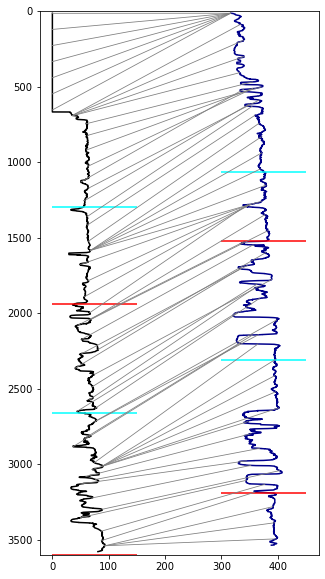

In [589]:
fig,axes = plt.subplots(nrows=1,figsize=(5,10))
axes.plot(t1_cor['GR'],t1_cor['DEPTH'], color ='black')
axes.plot(t2['GR']+300,t2['DEPTH'], color ='darkblue')
axes.set_ylim(0,3600)
axes.invert_yaxis()

plt.hlines(1940, 0, 150, color='red')
#plt.text(0, 1527, 'DR3', ha ='left', va = 'bottom')
plt.hlines(1519, 300, 450, color='red')
#plt.text(400, 1799, 'DR3', ha ='left', va = 'bottom')
plt.hlines(1295, 0, 150, color='cyan')
#plt.text(0, 839, 'SMR3', ha ='left', va = 'bottom')
plt.hlines(1064, 300, 450, color='cyan')
#plt.text(400, 1172, 'SMR3', ha ='left', va = 'bottom')

plt.hlines(3603, 0, 150, color='red')
#plt.text(0, 3127, 'DR2', ha ='left', va = 'bottom')
plt.hlines(3189, 300, 450, color='red')
#plt.text(420, 3320, 'DR2', ha ='left', va = 'bottom')
plt.hlines(2663, 0, 150, color='cyan')
#plt.text(0, 2143, 'SMR2', ha ='left', va = 'bottom')
plt.hlines(2310, 300, 450, color='cyan')
#plt.text(420, 2312, 'SMR2', ha ='left', va = 'bottom')

for i in np.arange(0,len(path),700):
    axes.plot([t1_cor.GR.iloc[path[i][0]],t2.GR.iloc[path[i][1]]+300],[t1_cor.DEPTH.iloc[path[i][0]],t2.DEPTH.iloc[path[i][1]]],c='grey', lw=0.8)


In [507]:
optimal_path, dtw_score = dtw_path(t1_cor,t2)

In [542]:
matrix

array([[-64.4873, -64.4873, -64.4873, ..., -64.4873, -64.4873, -64.4873],
       [-64.4873, -64.4873, -64.4873, ..., -64.4873, -64.4873, -64.4873],
       [-64.4873, -64.4873, -64.4873, ..., -64.4873, -64.4873, -64.4873],
       ...,
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ]])

In [540]:
matrix = np.zeros((t1_cor.shape[0],t2.shape[0]))
x1 = t1_cor.GR.values[i]
x2 = t2.GR.values[j]
for i in range(t1_cor.shape[0]):
    for j in range(t2.shape[0]):
        matrix[i][j] = x1-x2

KeyboardInterrupt: 

In [514]:
from scipy.spatial.distance import cdist

In [516]:
matrix = cdist(t1_cor,t2)

In [517]:
import seaborn as sns

In [519]:
from tslearn.metrics import cdist_dtw

In [526]:
import scipy
def compute_cost_matrix(X, Y, metric='euclidean'):
    """Compute the cost matrix of two feature sequences

    Notebook: C3/C3S2_DTWbasic.ipynb

    Args:
        X (np.ndarray): Sequence 1
        Y (np.ndarray): Sequence 2
        metric (str): Cost metric, a valid strings for scipy.spatial.distance.cdist (Default value = 'euclidean')

    Returns:
        C (np.ndarray): Cost matrix
    """
    X, Y = np.atleast_2d(X, Y)
    C = scipy.spatial.distance.cdist(X.T, Y.T, metric=metric)
    return C


def compute_accumulated_cost_matrix(C):
    """Compute the accumulated cost matrix given the cost matrix

    Notebook: C3/C3S2_DTWbasic.ipynb

    Args:
        C (np.ndarray): Cost matrix

    Returns:
        D (np.ndarray): Accumulated cost matrix
    """
    N = C.shape[0]
    M = C.shape[1]
    D = np.zeros((N, M))
    D[0, 0] = C[0, 0]
    for n in range(1, N):
        D[n, 0] = D[n-1, 0] + C[n, 0]
    for m in range(1, M):
        D[0, m] = D[0, m-1] + C[0, m]
    for n in range(1, N):
        for m in range(1, M):
            D[n, m] = C[n, m] + min(D[n-1, m], D[n, m-1], D[n-1, m-1])
    return D


In [527]:
matrix = compute_cost_matrix(t1_cor,t2)

ValueError: XA and XB must have the same number of columns (i.e. feature dimension.)

In [520]:
matrix = cdist_dtw(t1_cor,t2)

KeyboardInterrupt: 

In [ ]:
plt.imshow(matrix)

In [518]:
sns.heatmap(matrix)


KeyboardInterrupt



Error in callback <function flush_figures at 0x000001521E506790> (for post_execute):



KeyboardInterrupt



In [509]:
from tslearn.metrics import 

In [513]:
matrix = subsequence_cost_matrix((t1_cor,len(t1_cor)),(t2,len(t2)))

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at C:\ProgramData\Anaconda3\lib\site-packages\tslearn\metrics\dtw_variants.py (751)[0m
[1m
File "..\..\..\..\..\..\ProgramData\Anaconda3\lib\site-packages\tslearn\metrics\dtw_variants.py", line 751:[0m
[1mdef _subsequence_cost_matrix(subseq, longseq):
[1m    l1 = subseq.shape[0]
[0m    [1m^[0m[0m 

This error may have been caused by the following argument(s):
- argument 0: [1mCannot determine Numba type of <class 'pandas.core.frame.DataFrame'>[0m
- argument 1: [1mCannot determine Numba type of <class 'pandas.core.frame.DataFrame'>[0m 

This error may have been caused by the following argument(s):
- argument 0: [1mCannot determine Numba type of <class 'tuple'>[0m
- argument 1: [1mCannot determine Numba type of <class 'tuple'>[0m
